# Introduction
* 북미에서 판매되고 있는 SUV 60종을 크기를 기준으로 Kmeans Clustering 하여 Maxcruz의 크기기준 **경쟁차량 파악**

In [192]:
import pandas as pd
import urllib.request, json
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()
%matplotlib inline

In [193]:
from matplotlib import font_manager, rc
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

In [194]:
## 군집화시작

from sklearn.cluster import KMeans
import mglearn


In [4]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec\\Segment관련_SUV')

In [5]:
suv_table = open('real_final_suv_seg3.json').read()
suv_table = pd.DataFrame(json.loads(suv_table))
SUV_D_cluster1 = suv_table[suv_table["Segment"] == 'Seg1']
SUV_D_cluster2 = suv_table[suv_table["Segment"] == 'Seg2']
SUV_D_cluster = pd.concat([SUV_D_cluster1, SUV_D_cluster2])

In [7]:
print(SUV_D_cluster.shape)
SUV_D_cluster.head(5)

(36, 34)


,Brand,GLOBAL_SEGMENT,MPG_avg,Segment,Segment_y,Y2012,Y2013,Y2014,Y2015,Y2016,...,pass_capa,pass_vol,s_head,s_hip,s_leg,s_shoulder,track_width_front,track_width_rear,wheelbase,width
0,GMC,SUV-D,22.5,Seg1,Mid_SUV,78280,89793,83972,96393,88466,...,6,135.4318,39.6,53.3,39.7,58.7,64.5,64.5,112.5,75.4
10,Acura,SUV-D,23.5,Seg1,Mid_SUV,29520,44750,44865,51026,52361,...,5,129.6000,38.1,53.8,38.3,57.2,63.1,63.4,105.7,73.7
11,Hyundai,SUV-D,20.1,Seg1,Mid_SUV,0,17824,32442,31701,39383,...,7,166.6000,39.4,55.4,40.4,58.3,64.1,64.5,110.2,74.2
12,Hyundai,SUV-D,23.1,Seg1,Mid_SUV,71016,71020,75464,86433,91882,...,5,143.4000,39.1,55.4,39.4,58.3,64.3,64.7,106.3,74.0
13,Kia,SUV-D,22.0,Seg1,Mid_SUV,119597,105649,102520,116249,114733,...,7,154.2000,39.3,56.4,39.4,58.0,64.1,64.5,109.4,74.4


# SUV-D

## 가격 - 마력

In [11]:
D_price_hp = SUV_D_cluster[['baseMSRP','horsepower']].values

In [12]:
SUV_D_cluster.index = SUV_D_cluster['model_name']

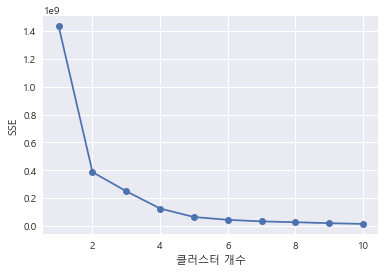

In [13]:
def elbow(x):
    sse = []
    for i in range(1,11):
        km=KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show

elbow(D_price_hp)

In [14]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(D_price_hp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
SUV_D_cluster.index = [x for x in range(len(SUV_D_cluster))]

In [17]:
SUV_D_cluster[SUV_D_cluster['model_name']=='santa-fe-sport'].index

Int64Index([3], dtype='int64')

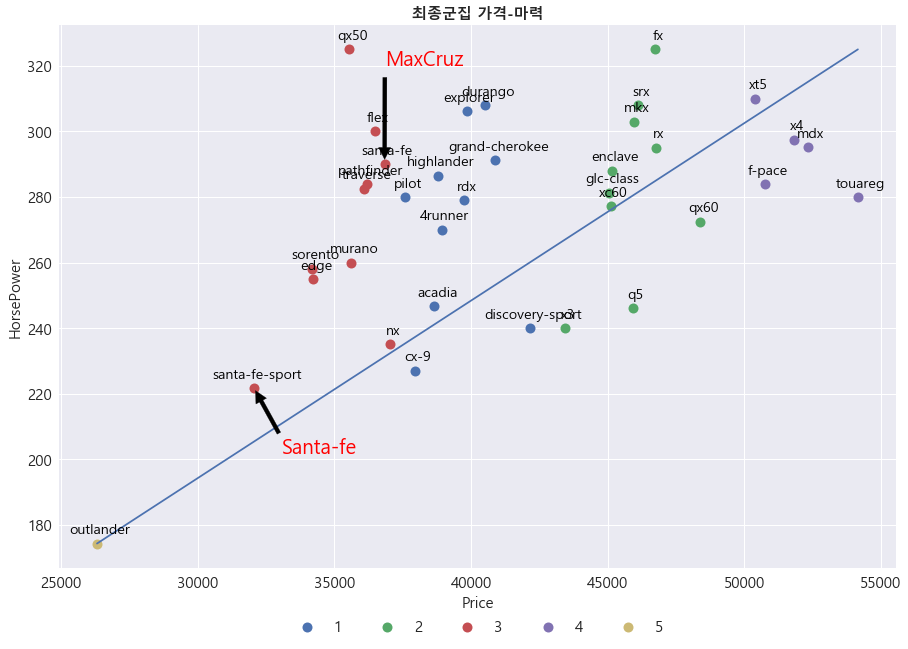

In [21]:
labels = ['1', '2', '3', '4', '5']
plot_x = pd.DataFrame(D_price_hp)[0]
plot_y = pd.DataFrame(D_price_hp)[1]

fig, ax = plt.subplots(1, figsize=(15,10))
mglearn.discrete_scatter(D_price_hp[:, 0], D_price_hp[:, 1], kmeans.labels_, markers='o')


for i, txt in enumerate(SUV_D_cluster['model_name']):
    ax.annotate(txt, (D_price_hp[i][0]+100,D_price_hp[i][1]+3), color='black', 
                size=14, ha='center')

plt.xlabel('Price', fontsize=15)
plt.ylabel('HorsePower', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=6, prop={'size':15})

ax.annotate('MaxCruz', xy=(D_price_hp[2][0], D_price_hp[2][1]), xytext=(D_price_hp[2][0]+10, D_price_hp[2][1]+30),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='red')

ax.annotate('Santa-fe', xy=(D_price_hp[3][0], D_price_hp[3][1]), xytext=(D_price_hp[3][0]+1000, D_price_hp[3][1]-20),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='red')

plt.plot([plot_x.min(),plot_x.max()],[plot_y.min(),plot_y.max()])
plt.title('최종군집 가격-마력', fontsize=15, weight='bold')
plt.savefig('최종군집 가격-마력')
plt.show()


## 가격 - 연비

In [22]:
D_price_mpg =SUV_D_cluster[['baseMSRP','MPG_avg']].values

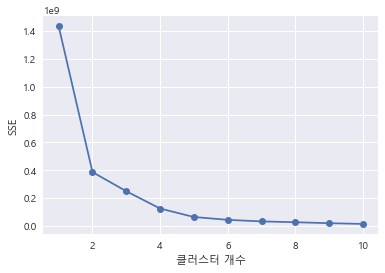

In [23]:
def elbow(x):
    sse = []
    for i in range(1,11):
        km=KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show

elbow(D_price_mpg)

In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(D_price_mpg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

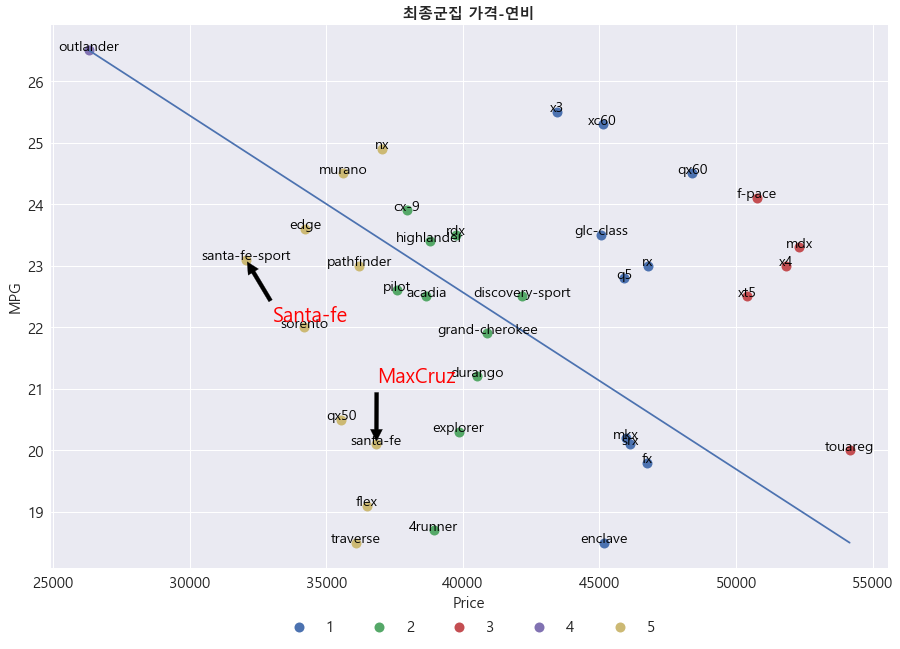

In [26]:
labels = ['1', '2', '3', '4', '5']
plot_x = pd.DataFrame(D_price_mpg)[0]
plot_y = pd.DataFrame(D_price_mpg)[1]


fig, ax = plt.subplots(1, figsize=(15,10))
mglearn.discrete_scatter(D_price_mpg[:, 0], D_price_mpg[:, 1], kmeans.labels_, markers='o')


for i, txt in enumerate(SUV_D_cluster['model_name']):
    ax.annotate(txt, (D_price_mpg[i][0],D_price_mpg[i][1]), color='black', 
                size=14, ha='center')

plt.xlabel('Price', fontsize=15)
plt.ylabel('MPG', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=6, prop={'size':15})

ax.annotate('MaxCruz', xy=(D_price_mpg[2][0], D_price_mpg[2][1]), xytext=(D_price_mpg[2][0]+10, D_price_mpg[2][1]+1),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='red')

ax.annotate('Santa-fe', xy=(D_price_mpg[3][0], D_price_mpg[3][1]), xytext=(D_price_mpg[3][0]+1000, D_price_mpg[3][1]-1),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='red')


plt.title('최종군집 가격-연비', fontsize=15, weight='bold')

plt.plot([plot_x.min(),plot_x.max()],[plot_y.max(),plot_y.min()])

plt.savefig('최종군집 가격-연비')

## 최종군집 Size기준

In [195]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec\\Segment관련_SUV')

In [172]:
suv_table = open('real_final_suv_seg3.json').read()
suv_table = pd.DataFrame(json.loads(suv_table))
SUV_D_cluster1 = suv_table[suv_table["Segment"] == 'Seg1']
SUV_D_cluster2 = suv_table[suv_table["Segment"] == 'Seg2']
SUV_D_cluster = pd.concat([SUV_D_cluster1, SUV_D_cluster2])

In [173]:
SUV_D_cluster.columns

Index(['Brand', 'GLOBAL_SEGMENT', 'MPG_avg', 'Segment', 'Segment_y', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'baseMSRP', 'base_weight',
       'cargo_space', 'exterior', 'f_head', 'f_hip', 'f_leg', 'f_shoulder',
       'height', 'horsepower', 'interior', 'length', 'make_name', 'model_name',
       'pass_capa', 'pass_vol', 's_head', 's_hip', 's_leg', 's_shoulder',
       'track_width_front', 'track_width_rear', 'wheelbase', 'width'],
      dtype='object')

In [174]:
SUV_D_cluster['interior_weight'] = SUV_D_cluster['interior'] + SUV_D_cluster['base_weight']
SUV_D_cluster['full_size'] = SUV_D_cluster['interior'] + SUV_D_cluster['exterior']


In [175]:
feature = ['pass_capa', 'f_head', 'f_leg','f_shoulder', 'f_hip', 's_head', 's_leg', 's_shoulder', 's_hip',
        'wheelbase', 'length', 'width', 'height','track_width_front', 'track_width_rear',
           'interior','exterior','cargo_space','pass_vol','baseMSRP','interior_weight']
cluster_value = SUV_D_cluster[feature].values

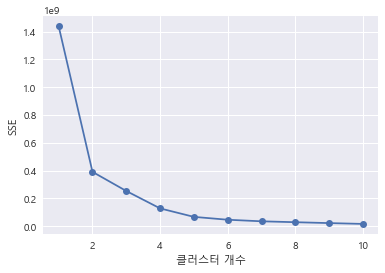

In [176]:
def elbow(x):
    sse = []
    for i in range(1,11):
        km=KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show

elbow(cluster_value)

In [177]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_value)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [178]:
SUV_D_cluster.index = [x for x in range(len(SUV_D_cluster))]

In [179]:
SUV_D_cluster[SUV_D_cluster['model_name']=='santa-fe-sport'].index

Int64Index([3], dtype='int64')

In [180]:
len(feature)

21

In [183]:
cluster_value[0][19]

38659.099999999999

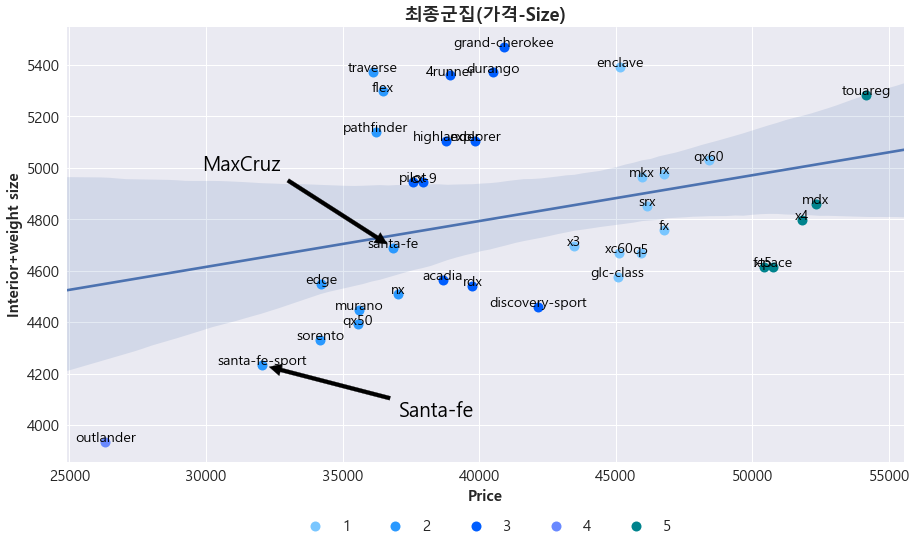

In [191]:
labels = ['1', '2', '3', '4', '5']
plot_x = pd.DataFrame(cluster_value)[19]
plot_y = pd.DataFrame(cluster_value)[20]


label_color=['#79c6ff','#2a99ff','#005eff','#6989ff','#00838d']

fig, ax = plt.subplots(1, figsize=(15,8))
mglearn.discrete_scatter(cluster_value[:, 19], cluster_value[:, 20], kmeans.labels_, markers='o', c=label_color)


for i, txt in enumerate(SUV_D_cluster['model_name']):
    ax.annotate(txt, (cluster_value[i][19],cluster_value[i][20]), color='black', 
                size=14, ha='center')

    
sns.regplot(x=plot_x, y=plot_y)

plt.xlabel('Price', fontsize=15, weight='bold')
plt.ylabel('Interior+weight size', fontsize=15,weight='bold')
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True, ncol=6, prop={'size':15})

ax.annotate('MaxCruz', xy=(cluster_value[2][19], cluster_value[2][20]), xytext=(cluster_value[2][19]-7000, cluster_value[2][20]+300),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='black')

ax.annotate('Santa-fe', xy=(cluster_value[3][19], cluster_value[3][20]), xytext=(cluster_value[3][19]+5000, cluster_value[3][20]-200),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='black')


plt.title('최종군집(가격-Size)', fontsize=18, weight='bold')


plt.savefig('최종군집(가격-Size)')

In [ ]:
# highlander , pilot, pathfinder, traverse, acadia, explorer , murano

## Target들만 Segment하면??

# Seg1, Seg2(30000~55000) 의 군집 중 Max경쟁차량의 비중

In [233]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec\\Segment관련_SUV')
suv_table = open('real_final_suv_seg2.json').read()
suv_table = pd.DataFrame(json.loads(suv_table))
SUV_D_cluster = suv_table

In [240]:
model_list = ['santa-fe','murano','pathfinder','flex','acadia','highlander','pilot','cx-9','durango','4runner','grand-cherokee','edge','explorer','traverse','sorento']

for model in model_list:
    SUV_D_cluster.loc[SUV_D_cluster['model_name']==model,'Target_Seg'] = 'Target_suv'
    
SUV_D_cluster.loc[SUV_D_cluster['Target_Seg'] != 'Target_suv', 'Target_Seg'] = 'Non_Target_suv'

In [243]:
Target_s = SUV_D_cluster[SUV_D_cluster['Target_Seg']=='Target_suv']
Target_s[['Brand','model_name','GLOBAL_SEGMENT','Segment_y']]

,Brand,model_name,GLOBAL_SEGMENT,Segment_y
0,Toyota,4runner,SUV-D,Midsize_SUV
1,GMC,acadia,SUV-D,Midsize_SUV
14,Nissan,murano,SUV-D,Midsize_SUV
18,Nissan,pathfinder,SUV-D,Midsize_SUV
19,Honda,pilot,SUV-D,Midsize_SUV
23,Ford,explorer,SUV-E,Midsize_SUV
27,Mazda,cx-9,SUV-D,Midsize_SUV
30,Hyundai,santa-fe,SUV-D,Midsize_SUV
33,Ford,flex,SUV-E,Midsize_SUV
34,Kia,sorento,SUV-D,Midsize_SUV


In [ ]:
S

In [223]:
test = SUV_D_cluster.groupby(SUV_D_cluster['Target_Seg']).sum().reset_index()
merge_table = test[['Target_Seg','Y2012','Y2013','Y2014','Y2015','Y2016']]
merge_table

,Target_Seg,Y2012,Y2013,Y2014,Y2015,Y2016
0,Non_Target_suv,1663011,1792745,1899352,2119804,2249807
1,Target_suv,509897,597390,617034,702821,759325


In [224]:
total_sum = [ merge_table['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0] + total_sum
merge_table.loc[('total_sell_year')] = total_sum

C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [225]:
for x in range(2,7):
    merge_table['Y201'+str(x)] = (merge_table['Y201'+str(x)]/merge_table.loc[('total_sell_year')].values[x-1])*100

C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [226]:
merge_table = merge_table.drop(['total_sell_year'])

In [227]:
merge_table

,Target_Seg,Y2012,Y2013,Y2014,Y2015,Y2016
0,Non_Target_suv,76.533889,75.006014,75.479358,75.100447,74.765979
1,Target_suv,23.466111,24.993986,24.520642,24.899553,25.234021


In [228]:
merge_table = pd.DataFrame(merge_table.stack()).reset_index()
merge_table.columns = ['Index','Year','Amount']
for x in set(merge_table['Index']):
    merge_table.loc[merge_table['Index'] == x, 'Index'] = merge_table['Amount'][6*(x)]
    merge_table = merge_table.drop([6*(x)])

In [229]:
merge_table

,Index,Year,Amount
1,Non_Target_suv,Y2012,76.5339
2,Non_Target_suv,Y2013,75.006
3,Non_Target_suv,Y2014,75.4794
4,Non_Target_suv,Y2015,75.1004
5,Non_Target_suv,Y2016,74.766
7,Target_suv,Y2012,23.4661
8,Target_suv,Y2013,24.994
9,Target_suv,Y2014,24.5206
10,Target_suv,Y2015,24.8996
11,Target_suv,Y2016,25.234


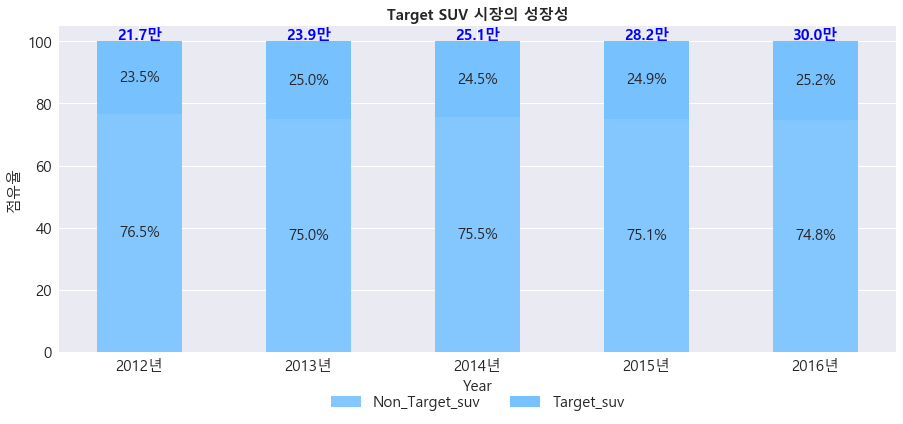

In [210]:
dummy_table = pd.DataFrame(np.arange(1).reshape(1,1))

## change
label_list = ['Non_Target_suv','Target_suv']


sum_list = [ str(total_sum[x])[:2]+"."+str(total_sum[x])[2]+"만" for x in range(1,6)]

for label in label_list:
    new_table = pd.DataFrame(merge_table[merge_table['Index']==label].sort_values('Year')['Amount'])
    new_table.index = [ x for x in range(len(new_table))]
    new_table.columns = [label]
    hap_table = pd.concat([dummy_table, new_table], axis=1)
    dummy_table = hap_table
    
hap_table = hap_table.drop([0],axis=1)

val_index = []
for j in hap_table.columns:
    for i in hap_table.index:
        label = str(round(hap_table.loc[i][j],1)) + "%"
        val_index.append(label)

fig, ax = plt.subplots(1,1)

fig.set_size_inches(15,6)

dates = np.arange(5)
labels = label_list

## change
colors= ['#84c7ff','#77c1ff']
margin_bottom = np.zeros(5)

for index, label in enumerate(labels):
    ## change
    values = merge_table[merge_table['Index']==label].sort_values('Year')['Amount'].apply(float)
    
    ax.bar(dates, values,
          align='center', width=0.5, label=label, color=colors[index], bottom=margin_bottom)
    margin_bottom += values
    
patches = ax.patches
for label, rect in zip(val_index, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., y+height/2., label, ha='center', va='center', fontsize=15)
        
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=True, shadow=True, ncol=6, prop={'size':15})

for label, rect in zip(sum_list, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., 102, label, ha='center', va='center', fontsize=15, weight='bold', color='blue')

plt.xlabel('Year', fontsize=15)
plt.ylabel('점유율', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(['0','2012년','2013년','2014년','2015년','2016년'])

plt.title('Target SUV 시장의 성장성', fontsize=15, weight='bold')
plt.savefig('Target SUV 시장의 성장성')

## TargetSUV에서 Maxcruz의 점유율

In [230]:
T_table = SUV_D_cluster[SUV_D_cluster['Target_Seg']=='Target_suv']
T_table

,Brand,GLOBAL_SEGMENT,MPG_avg,Segment_y,Y2012,Y2013,Y2014,Y2015,Y2016,baseMSRP,...,pass_vol,s_head,s_hip,s_leg,s_shoulder,track_width_front,track_width_rear,wheelbase,width,Target_Seg
0,Toyota,SUV-D,18.7,Midsize_SUV,48753,51625,76906,97034,111952,38929.4,...,144.5000,38.6,55.7,32.9,57.8,63.2,63.2,109.8,75.8,Target_suv
1,GMC,SUV-D,22.5,Midsize_SUV,78280,89793,83972,96393,88466,38659.1,...,135.4318,39.6,53.3,39.7,58.7,64.5,64.5,112.5,75.4,Target_suv
14,Nissan,SUV-D,24.5,Midsize_SUV,51675,44684,47301,62907,86953,35612.5,...,140.2000,39.8,55.2,38.7,58.8,64.6,64.6,111.2,75.4,Target_suv
18,Nissan,SUV-D,23.0,Midsize_SUV,42621,88632,79111,82041,81701,36205.0,...,173.8000,39.4,56.1,41.7,60.4,65.7,65.7,114.2,77.2,Target_suv
19,Honda,SUV-D,22.6,Midsize_SUV,114848,126678,108857,136212,120772,37585.9,...,170.2000,39.9,57.3,38.4,62.0,66.3,66.3,111.0,78.6,Target_suv
27,Mazda,SUV-D,23.9,Midsize_SUV,24442,24628,18496,18048,16051,37947.9,...,149.5000,38.5,57.4,39.4,58.1,65.3,65.2,115.3,77.2,Target_suv
30,Hyundai,SUV-D,20.1,Midsize_SUV,0,17824,32442,31701,39383,36837.5,...,166.6000,39.4,55.4,40.4,58.3,64.1,64.5,110.2,74.2,Target_suv
33,Ford,SUV-E,19.1,Midsize_SUV,28224,25953,23822,19570,22668,36479.2,...,175.8000,40.5,55.0,44.3,58.1,65.4,65.4,117.9,75.9,Target_suv
7,Toyota,SUV-E,23.4,Midsize_SUV,121054,127573,146127,158915,191379,38788.5,...,156.0000,39.6,57.1,38.4,59.0,64.4,64.2,109.8,75.8,Target_suv


In [212]:
merge_table = T_table[['model_name','Y2012','Y2013','Y2014','Y2015','Y2016']]

In [213]:
total_sum = [ merge_table['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0] + total_sum
merge_table.loc[('total_sell_year')] = total_sum
for x in range(2,7):
    merge_table['Y201'+str(x)] = (merge_table['Y201'+str(x)]/merge_table.loc[('total_sell_year')].values[x-1])*100
merge_table = merge_table.drop(['total_sell_year'])

merge_table.index = [x for x in range(len(merge_table))]

C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [214]:
merge_table.sort_values('Y2016',ascending=False)

,model_name,Y2012,Y2013,Y2014,Y2015,Y2016
8,highlander,23.740873,21.355061,23.682163,22.611020,25.203832
4,pilot,22.523765,21.205243,17.641978,19.380753,15.905179
0,4runner,9.561343,8.641758,12.463819,13.806360,14.743621
1,acadia,15.352120,15.030884,13.608975,13.715156,11.650611
2,murano,10.134400,7.479871,7.665866,8.950643,11.451355
3,pathfinder,8.358747,14.836539,12.821174,11.673100,10.759688
6,santa-fe,0.000000,2.983646,5.257733,4.510537,5.186580
7,flex,5.535236,4.344398,3.860727,2.784493,2.985283
5,cx-9,4.793517,4.122600,2.997566,2.567937,2.113851


In [215]:
merge_table = pd.DataFrame(merge_table.stack()).reset_index()
merge_table.columns = ['Index','Year','Amount']
for x in set(merge_table['Index']):
    merge_table.loc[merge_table['Index'] == x, 'Index'] = merge_table['Amount'][6*(x)]
    merge_table = merge_table.drop([6*(x)])

In [216]:
merge_table['Index'].unique()

array(['4runner', 'acadia', 'murano', 'pathfinder', 'pilot', 'cx-9',
       'santa-fe', 'flex', 'highlander'], dtype=object)

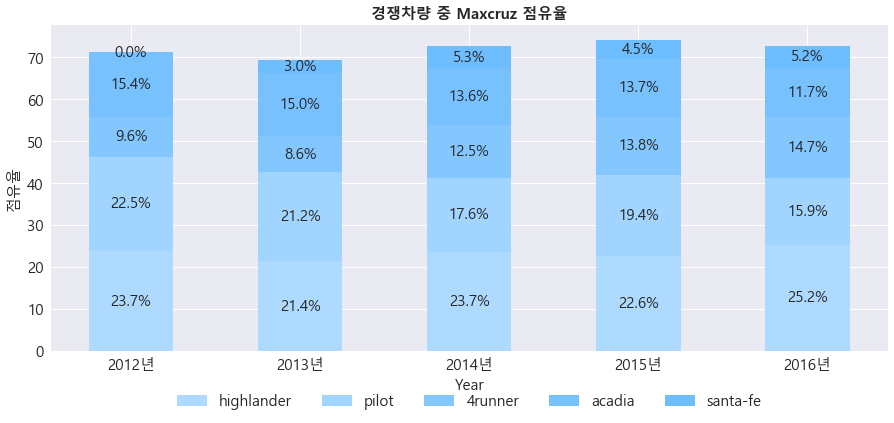

In [218]:
dummy_table = pd.DataFrame(np.arange(1).reshape(1,1))

## change
label_list = ['highlander','pilot','4runner','acadia','santa-fe']


sum_list = [ str(total_sum[x])[:2]+"."+str(total_sum[x])[2]+"만" for x in range(1,6)]

for label in label_list:
    new_table = pd.DataFrame(merge_table[merge_table['Index']==label].sort_values('Year')['Amount'])
    new_table.index = [ x for x in range(len(new_table))]
    new_table.columns = [label]
    hap_table = pd.concat([dummy_table, new_table], axis=1)
    dummy_table = hap_table
    
hap_table = hap_table.drop([0],axis=1)

val_index = []
for j in hap_table.columns:
    for i in hap_table.index:
        label = str(round(hap_table.loc[i][j],1)) + "%"
        val_index.append(label)

fig, ax = plt.subplots(1,1)

fig.set_size_inches(15,6)

dates = np.arange(5)
labels = label_list

## change
colors= ['#afdaff','#a1d4ff','#84c7ff','#77c1ff','#6dbdff']
margin_bottom = np.zeros(5)

for index, label in enumerate(labels):
    ## change
    values = merge_table[merge_table['Index']==label].sort_values('Year')['Amount'].apply(float)
    
    ax.bar(dates, values,
          align='center', width=0.5, label=label, color=colors[index], bottom=margin_bottom)
    margin_bottom += values
    
patches = ax.patches
for label, rect in zip(val_index, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., y+height/2., label, ha='center', va='center', fontsize=15)
        
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=True, shadow=True, ncol=6, prop={'size':15})


plt.xlabel('Year', fontsize=15)
plt.ylabel('점유율', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(['0','2012년','2013년','2014년','2015년','2016년'])

plt.title('경쟁차량 중 Maxcruz 점유율', fontsize=15, weight='bold')
plt.savefig('경쟁차량 중 Maxcruz 점유율')

# Target

## 가격-마력

In [54]:
SUV_E_cluster = suv_table[suv_table["Segment"] == 'Target_SUV']

In [55]:
E_price_hp = SUV_E_cluster[['baseMSRP','horsepower']].values

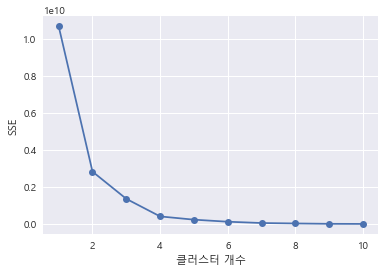

In [56]:
def elbow(x):
    sse = []
    for i in range(1,11):
        km=KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show

elbow(E_price_hp)

In [57]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(E_price_hp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

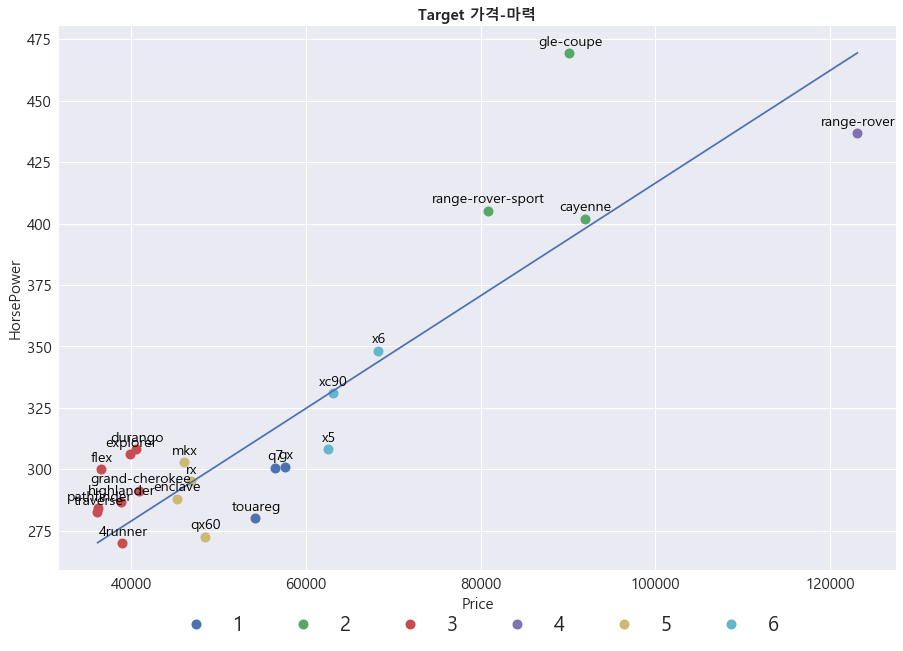

In [61]:
labels = ['1', '2', '3', '4', '5', '6']
plot_x = pd.DataFrame(E_price_hp)[0]
plot_y = pd.DataFrame(E_price_hp)[1]

fig, ax = plt.subplots(1, figsize=(15,10))
mglearn.discrete_scatter(E_price_hp[:, 0], E_price_hp[:, 1], kmeans.labels_, markers='o')


for i, txt in enumerate(SUV_E_cluster['model_name']):
    ax.annotate(txt, (E_price_hp[i][0]+100,E_price_hp[i][1]+3), color='black', 
                size=14, ha='center')

plt.xlabel('Price', fontsize=15)
plt.ylabel('HorsePower', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6, prop={'size':20})


plt.plot([plot_x.min(),plot_x.max()],[plot_y.min(),plot_y.max()])

plt.title('Target 가격-마력', fontsize=15, weight='bold')
plt.savefig('Target 가격-마력')
plt.show()


## 가격-연비

In [64]:
E_price_mpg = SUV_E_cluster[['baseMSRP','MPG_avg']].values

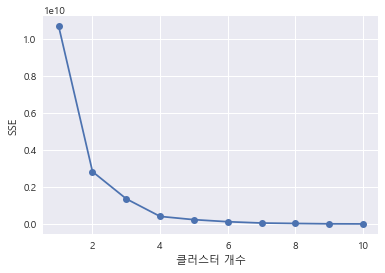

In [65]:
def elbow(x):
    sse = []
    for i in range(1,11):
        km=KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show

elbow(E_price_mpg)

In [66]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(E_price_mpg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

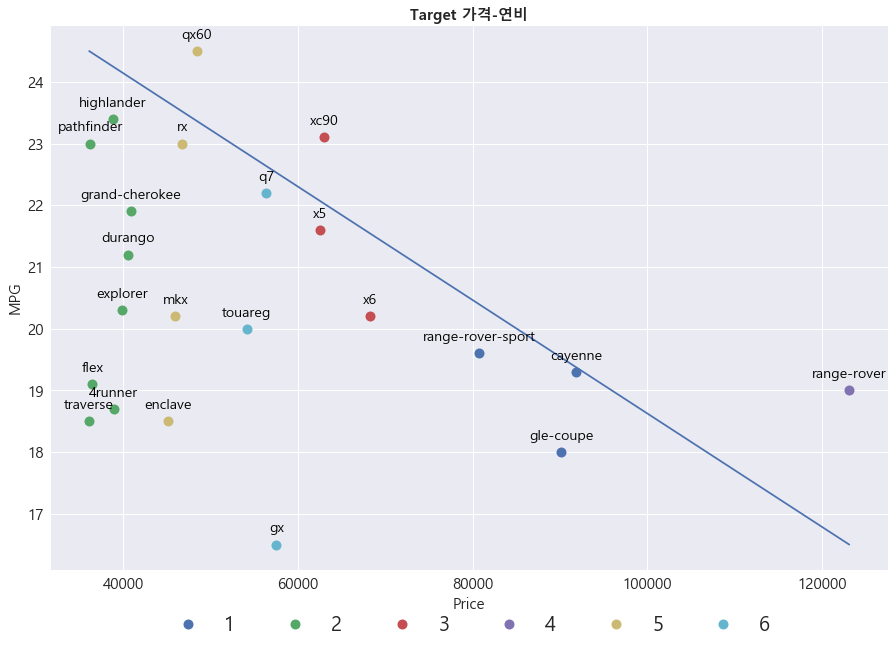

In [67]:
labels = ['1', '2', '3', '4', '5', '6']
plot_x = pd.DataFrame(E_price_mpg)[0]
plot_y = pd.DataFrame(E_price_mpg)[1]

fig, ax = plt.subplots(1, figsize=(15,10))
mglearn.discrete_scatter(E_price_mpg[:, 0], E_price_mpg[:, 1], kmeans.labels_, markers='o')


for i, txt in enumerate(SUV_E_cluster['model_name']):
    ax.annotate(txt, (E_price_mpg[i][0],E_price_mpg[i][1]+0.2), color='black', 
                size=14, ha='center')

plt.xlabel('Price', fontsize=15)
plt.ylabel('MPG', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6, prop={'size':20})


plt.title('Target 가격-연비', fontsize=15, weight='bold')
plt.plot([plot_x.min(),plot_x.max()],[plot_y.max(),plot_y.min()])

plt.savefig('Target 가격(연비)')
plt.show()


## Testing

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

In [238]:
iris = datasets.load_iris()

In [239]:
X = iris.data
y = iris.target

In [250]:
test = SUV_D_cluster.values

In [273]:
SUV_D_cluster.head(5)

,baseMSRP,horsepower,MPG_avg
model_name,,,
4runner,38929.4,270.0,18.7
acadia,38659.1,246.7,22.5
armada,52163.3,390.0,16.0
cx-9,37947.9,227.0,23.9
discovery-sport,42161.7,240.0,22.5


In [277]:
SUV_D_cluster.values[0]

array([  3.89294000e+04,   2.70000000e+02,   1.87000000e+01])

In [ ]:
ax.scatter(test[:, 1], test[:, 2], test[:, 0], c='b',s=70 )

In [310]:
test[0]

array([  3.89294000e+04,   2.70000000e+02,   1.87000000e+01])

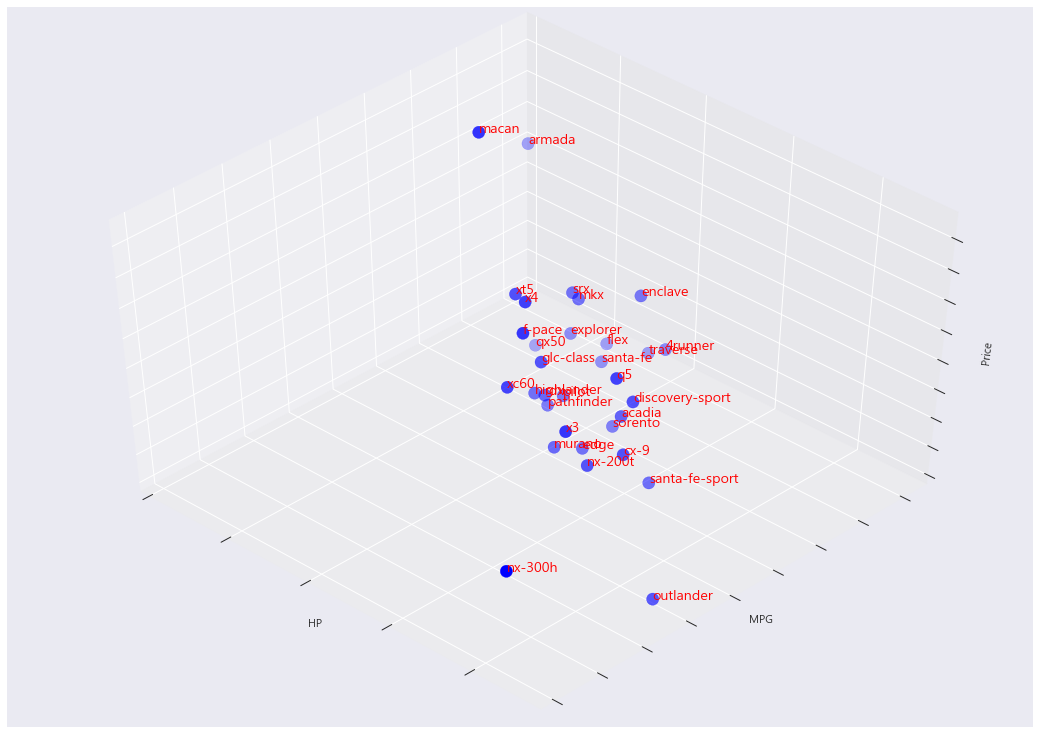

In [328]:
estimators = {'k_means_iris_3': KMeans(n_clusters=6)}

labels=['1','2','3','4','5','6']
fignum = 1

for name, est in estimators.items():
    fig, ax = plt.subplots(1, figsize=(15, 10))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(test)
    labels = est.labels_
    
    ax.scatter(test[:, 1], test[:, 2], test[:, 0], c='blue', s=150)
    
    for i, txt in enumerate(SUV_D_cluster.index):
        ax.text(test[i][1],test[i][2],test[i][0],txt, color='red', size=14)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel('HP')
    ax.set_ylabel('MPG')
    ax.set_zlabel('Price',)
